In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import ast
import json
import gc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
?pd.read_csv

In [32]:
train=pd.read_csv("train.csv",dtype={'fullVisitorId':str},parse_dates=[1],date_parser=lambda x:dt.datetime.strptime(x,'%Y%m%d'))
train.head()
#fullvisitorid is a unique identifier for each customer("string")
#Combination of fullvisitorid and visitid would be unique

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [33]:
a=train.geoNetwork[0]
print(json.loads(a))

{'continent': 'Asia', 'subContinent': 'Western Asia', 'country': 'Turkey', 'region': 'Izmir', 'metro': '(not set)', 'city': 'Izmir', 'cityId': 'not available in demo dataset', 'networkDomain': 'ttnet.com.tr', 'latitude': 'not available in demo dataset', 'longitude': 'not available in demo dataset', 'networkLocation': 'not available in demo dataset'}


In [34]:
#train['totals']=train['totals'].apply(lambda x:ast.literal_eval(x))
totals=train.totals.apply(lambda x:pd.Series(json.loads(x)))
del train['totals']
gc.collect()
train=pd.concat([train,totals],axis=1)
#print(totals.head())
devices=train.device.apply(lambda x:pd.Series(json.loads(x)))
del train['device']
gc.collect()
train=pd.concat([train,devices],axis=1)
#print(devices.head())
geo=train['geoNetwork'].apply(lambda x:pd.Series(json.loads(x)))
del train['geoNetwork']
gc.collect()
train=pd.concat([train,geo],axis=1)
traffic=train['trafficSource'].apply(lambda x:pd.Series(json.loads(x)))
del train['trafficSource']
gc.collect()
train=pd.concat([train,traffic],axis=1)
print(train.head())

  channelGrouping       date        fullVisitorId  \
0  Organic Search 2016-09-02  1131660440785968503   
1  Organic Search 2016-09-02   377306020877927890   
2  Organic Search 2016-09-02  3895546263509774583   
3  Organic Search 2016-09-02  4763447161404445595   
4  Organic Search 2016-09-02    27294437909732085   

                        sessionId  socialEngagementType     visitId  \
0  1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1   377306020877927890_1472880147  Not Socially Engaged  1472880147   
2  3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3  4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4    27294437909732085_1472822600  Not Socially Engaged  1472822600   

   visitNumber  visitStartTime bounces hits   ...       subContinent  \
0            1      1472830385       1    1   ...       Western Asia   
1            1      1472880147       1    1   ...        Australasia   
2            1      1472865386       1

In [35]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,bounces,hits,...,subContinent,adContent,adwordsClickInfo,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,1,...,Western Asia,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,1,...,Australasia,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,1,...,Southern Europe,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,1,...,Southeast Asia,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,1,...,Northern Europe,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,True,(not provided),organic,NaN,google


In [38]:
#pd.DataFrame.to_csv(new_train,"subset.csv")
train.to_csv("new_train.csv")

Load the new file from here

In [2]:
train=pd.read_csv("new_train.csv",dtype={'fullVisitorId':str},nrows=100)
train.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,bounces,...,subContinent,adContent,adwordsClickInfo,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,...,Western Asia,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
1,1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,...,Australasia,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
2,2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,...,Southern Europe,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
3,3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,...,Southeast Asia,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,google + online,organic,NaN,google
4,4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,...,Northern Europe,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,True,(not provided),organic,NaN,google


In [3]:
nms=train.columns

In [4]:
nms=[ 'channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'visitId', 'visitNumber', 'visitStartTime',
       'bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue',
       'visits', 'browser', 'deviceCategory',
        'operatingSystem', 
        'city', 'continent',
       'country', 'metro', 'networkDomain',
       'region', 'subContinent',
        'campaign', 'isTrueDirect',
        'medium', 'referralPath', 'source']

In [68]:
gc.collect()
train=pd.read_csv("new_train.csv",usecols=nms,dtype={'fullVisitorId':str,'sessionId':str,'visitId':str},parse_dates=[1],date_parser=lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))
print(train.columns)

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'bounces', 'hits', 'newVisits',
       'pageviews', 'transactionRevenue', 'visits', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'subContinent', 'campaign',
       'isTrueDirect', 'medium', 'referralPath', 'source'],
      dtype='object')


Text(0,0.5,'total_visits')

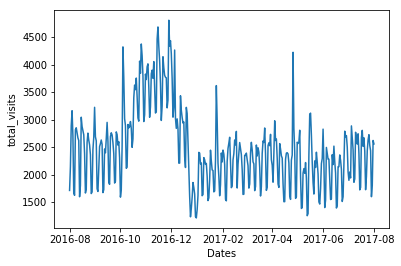

In [6]:
daily_visitors=train.groupby('date')['date'].count()
daily_visits=train.groupby
plt.plot(daily_visitors)
plt.xlabel('Dates')
plt.ylabel("total_visits")


In [7]:
pd.options.mode.chained_assignment=None

In [8]:
target='transactionRevenue'
y=train[target]
x=train.drop(target,axis=1)
del train
gc.collect()
train_val_x,test_x,train__val_y,test_y=train_test_split(x,y,test_size=.15,random_state=102)
del x
del y
gc.collect()

11

In [9]:
train_x,val_x,train_y,val_y=train_test_split(train_val_x,train__val_y,test_size=.15,random_state=105)
print("train_size: {} validation_size: {} test_size: {}".format(train_x.shape,val_x.shape,test_x.shape))

train_size: (652889, 27) validation_size: (115216, 27) test_size: (135548, 27)


#### Feature Engg: Taking month and  week day from date column for capturing seasonality

def date_fe(train_x):
    train_x['weekday']=train_x['date'].apply(lambda x:'weekday_'+str(dt.datetime.weekday(x)))
    train_x['month']=train_x['date'].apply(lambda x:'month_'+str(x.month))
    return train_x
train_x=date_fe(train_x)

#### Feature Engg: channelGrouping- grouping others and affiliate as one entity

def channelG(train_x):
    train_x.loc[train_x.channelGrouping.isin(['(Other)','Affiliates']),'channelGrouping']="affiliate_other"
    return train_x
train_x=channelG(train_x)

train_x.channelGrouping.unique()

#### Feature Engg: Medium: Combine None and (not set)

train_x.medium.unique()

def medium(train_x):
    train_x.loc[train_x.medium.isin(['(none)','(not set)']),'medium']="unk"
    return train_x
train_x=medium(train_x)

#### Feature Engg: metro: keep (na in demo, not set and San Fra,New york,London, LA), group rest 

train_x.groupby('metro')['metro'].count().sort_values(ascending=False)
def metro(train_x):
    train_x.loc[~train_x.metro.isin(['not available in demo dataset','(not set)','San Francisco-Oakland-San Jose CA','New York NY','London','Los Angeles CA']),"metro"]="others"
    return train_x
train_x=metro(train_x)
train_x.metro.unique()


def fit(train_x,column_name,value):
    mask=train_x.groupby(column_name)[column_name].count()/train_x.shape[0] >value
    values_to_group=mask.index[~mask]
    def wrapper(df):
        df.loc[train_x[column_name].isin(values_to_group),column_name]="other"
        return df
    return wrapper

network=fit(train_x,"networkDomain",.01)
train_x=network(train_x)

os=fit(train_x,"operatingSystem",.01)
train_x=os(train_x)

train_x['operatingSystem'].unique()

refpath=fit(train_x,"referralPath",.08)
train_x=refpath(train_x)
train_x.fillna({"referralPath":"missing"},inplace=True)
train_x.referralPath.unique()

region=fit(train_x,"region",.01)
train_x=region(train_x)

subc=fit(train_x,"subContinent",.01)
train_x=subc(train_x)

train_x['newCustomer']=train_x['visitNumber'].apply(lambda x: 'yes' if x>1  else 'no' )

train_x.newCustomer.unique()

def date_fe(train_x):
    train_x['weekday']=train_x['date'].apply(lambda x:'weekday_'+str(dt.datetime.weekday(x)))
    train_x['month']=train_x['date'].apply(lambda x:'month_'+str(x.month))
    return train_x
train_x=date_fe(train_x)

#### Feature Engg: channelGrouping- grouping others and affiliate as one entity

def channelG(train_x):
    train_x.loc[train_x.channelGrouping.isin(['(Other)','Affiliates']),'channelGrouping']="affiliate_other"
    return train_x
train_x=channelG(train_x)

train_x.channelGrouping.unique()

#### Feature Engg: Medium: Combine None and (not set)

train_x.medium.unique()

def medium(train_x):
    train_x.loc[train_x.medium.isin(['(none)','(not set)']),'medium']="unk"
    return train_x
train_x=medium(train_x)

#### Feature Engg: metro: keep (na in demo, not set and San Fra,New york,London, LA), group rest 

train_x.groupby('metro')['metro'].count().sort_values(ascending=False)
def metro(train_x):
    train_x.loc[~train_x.metro.isin(['not available in demo dataset','(not set)','San Francisco-Oakland-San Jose CA','New York NY','London','Los Angeles CA']),"metro"]="others"
    return train_x
train_x=metro(train_x)
train_x.metro.unique()


def fit(train_x,column_name,value):
    mask=train_x.groupby(column_name)[column_name].count()/train_x.shape[0] >value
    values_to_group=mask.index[~mask]
    def wrapper(df):
        df.loc[train_x[column_name].isin(values_to_group),column_name]="other"
        return df
    return wrapper

network=fit(train_x,"networkDomain",.01)
train_x=network(train_x)

os=fit(train_x,"operatingSystem",.01)
train_x=os(train_x)

train_x['operatingSystem'].unique()

refpath=fit(train_x,"referralPath",.08)
train_x=refpath(train_x)
train_x.fillna({"referralPath":"missing"},inplace=True)
train_x.referralPath.unique()

region=fit(train_x,"region",.01)
train_x=region(train_x)

subc=fit(train_x,"subContinent",.01)
train_x=subc(train_x)

train_x['newCustomer']=train_x['visitNumber'].apply(lambda x: 'yes' if x>1  else 'no' )

train_x.newCustomer.unique()

#### For now removing adContent  because  of too many missing values 

del train_x['adContent']

browser=fit(train_x,"browser",.01)
train_x=browser(train_x)
train_x.browser.unique()

camp=fit(train_x,"campaign",.01)
train_x=camp(train_x)

country=fit(train_x,"country",.01)
train_x=country(train_x)

### Start from here

In [20]:
df=train_x.copy()
df['isTrueDirect']=df.isTrueDirect.apply(lambda x:1 if str(x)=="True" else 0)
df.isTrueDirect.head(20)

534790    1
572300    0
521918    0
565947    0
239078    0
332858    0
477250    0
525976    0
446615    1
876014    1
504655    0
357339    0
743392    0
747988    1
212370    0
495137    0
553255    0
887459    1
296011    1
811086    0
Name: isTrueDirect, dtype: int64

In [11]:
def date_fe(train_x):
    train_x['weekday']=train_x['date'].apply(lambda x:'weekday_'+str(dt.datetime.weekday(x)))
    train_x['month']=train_x['date'].apply(lambda x:'month_'+str(x.month))
    return train_x
def channelG(train_x):
    train_x.loc[train_x.channelGrouping.isin(['(Other)','Affiliates']),'channelGrouping']="affiliate_other"
    return train_x
def medium(train_x):
    train_x.loc[train_x.medium.isin(['(none)','(not set)']),'medium']="unk"
    return train_x
def metro(train_x):
    train_x.loc[~train_x.metro.isin(['not available in demo dataset','(not set)','San Francisco-Oakland-San Jose CA','New York NY','London','Los Angeles CA']),"metro"]="others"
    return train_x
def fit(train_x,column_name,value):
    mask=train_x.groupby(column_name)[column_name].count()/train_x.shape[0] >value
    values_to_group=mask.index[~mask]
    def wrapper(df):
        df.loc[df[column_name].isin(values_to_group),column_name]="other"
        return df
    return wrapper
network=fit(train_x,"networkDomain",.01)
os=fit(train_x,"operatingSystem",.01)
refpath=fit(train_x,"referralPath",.08)
region=fit(train_x,"region",.01)
subc=fit(train_x,"subContinent",.01)
browser=fit(train_x,"browser",.01)
camp=fit(train_x,"campaign",.01)
country=fit(train_x,"country",.01)


In [21]:
def data_processing(df):
    df=date_fe(df)
    df=channelG(df)
    df=medium(df)
    df=metro(df)
    df['newCustomer']=df['visitNumber'].apply(lambda x: 'yes' if x>1  else 'no' )
    df['isTrueDirect']=df['isTrueDirect'].apply(lambda x:1 if str(x)=="True" else 0)
    df.fillna({"referralPath":"missing",'bounces':0,'newVisits':0,'isTrueDirect':0},inplace=True)
    #df['bounces']=df.bounces.map(boun)
    df=network(df)
    df=os(df)
    df=refpath(df)
    df=region(df)
    df=subc(df)
    df=browser(df)
    df=camp(df)
    df=country(df)
    return df

In [22]:
train_x=data_processing(train_x)
val_x=data_processing(val_x)

In [23]:
cat_columns=train_x.columns[train_x.dtypes==np.object]
num_columns=train_x.columns[train_x.dtypes!=np.object]

In [24]:
cat_columns

Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'visitId', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'subContinent', 'campaign',
       'medium', 'referralPath', 'source', 'weekday', 'month', 'newCustomer'],
      dtype='object')

In [25]:
num_columns

Index(['date', 'visitNumber', 'visitStartTime', 'bounces', 'hits', 'newVisits',
       'pageviews', 'visits', 'isTrueDirect'],
      dtype='object')

In [ ]:
df=train_x
for column in ['channelGrouping', 'browser',
       'deviceCategory', 'operatingSystem', 'city', 'continent', 'country',
       'metro', 'networkDomain', 'region', 'subContinent', 'campaign',
       'isTrueDirect', 'medium', 'referralPath', 'source', 'weekday', 'month',
       'newCustomer']:
    print(df.groupby(column)['visits'].sum().sort_values(ascending=False)/df.shape[0])
    print("\n")

Check if Visitor ID, visitid, and sessionid have only one observation
There are 453 instances of multiple sessionIds which can be ignored

In [49]:
sum(train_x.groupby('sessionId')['sessionId'].count().sort_values(ascending=False)>1)

453

In [31]:
pd.options.display.max_columns=None

In [46]:
print(train_x[train_x.sessionId=="0843652805982784552_1476255451"])

       channelGrouping       date        fullVisitorId  \
650441  Organic Search 2016-10-11  0843652805982784552   
604811  Organic Search 2016-10-12  0843652805982784552   

                             sessionId     visitId  visitNumber  \
650441  0843652805982784552_1476255451  1476255451            1   
604811  0843652805982784552_1476255451  1476255451            1   

        visitStartTime  bounces  hits  newVisits  pageviews  visits browser  \
650441      1476255451      1.0     1        1.0        1.0       1  Safari   
604811      1476255758      0.0    11        1.0        8.0       1  Safari   

       deviceCategory operatingSystem                           city  \
650441         mobile             iOS  not available in demo dataset   
604811         mobile             iOS  not available in demo dataset   

       continent  country                          metro networkDomain  \
650441    Europe  Germany  not available in demo dataset         other   
604811    Europe  Ge

In [57]:
real_tst=pd.read_csv("test.csv",usecols=['fullVisitorId','date','sessionId'],dtype={"fullVisitorId":str,"sessionId":str},parse_dates=["date"],date_parser=lambda x: dt.datetime.strptime(x,"%Y%m%d"))

#### There are overall in visitors, which means there are some visitors in training as well in test set 

In [65]:
mtc="fullVisitorId"
train_x[[mtc]].merge(real_tst[[mtc]],on=mtc,how="inner").shape

(129501, 1)

In [71]:
column_name="fullVisitorId"

tot_value=train.groupby(column_name)['transactionRevenue'].sum()
avg_value=train.groupby(column_name)['transactionRevenue'].mean()

In [86]:
avg_value.to_frame().head()

,avg_value
fullVisitorId,
0000010278554503158,NaN
0000020424342248747,NaN
0000027376579751715,NaN
0000039460501403861,NaN
0000040862739425590,NaN


In [106]:
def category_replacement(train_x,column_name):
    train_x.fillna({'transactionRevenue':0},inplace=True)
    tot_value=train_x.groupby(column_name)['transactionRevenue'].sum()
    tot_value.rename(column_name+"_tot_value",inplace=True)
    avg_value=train_x.groupby(column_name)['transactionRevenue'].mean()
    avg_value.rename(column_name+"_avg_value",inplace=True)
    def wrapper(df):
        df=df.merge(tot_value.to_frame(),how="left",left_on=column_name,right_index=True)
        df=df.merge(avg_value.to_frame(),how='left',left_on=column_name,right_index=True)
        df.fillna({column_name+"_tot_value":0.0,column_name+"_avg_value":0.0},inplace=True)
        df.drop(column_name,axis=1,inplace=True)
        return df
    return wrapper

In [107]:
source=category_replacement(pd.concat([train_x,train_y],axis=1),"source")


In [108]:
train_x=source(train_x)

In [109]:
val_x=source(val_x)

In [110]:
test_x=source(test_x)

In [102]:
df.head(5)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,visits,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,campaign,isTrueDirect,medium,referralPath,source,weekday,month,newCustomer,source_tot_value,source_avg_value
534790,Social,2016-10-03,1969013567959818171,1969013567959818171_1475508188,1475508188,2,1475508188,0.0,2,0.0,2.0,1,Chrome,desktop,Linux,New York,Americas,United States,New York NY,(not set),New York,Northern America,(not set),1,referral,other,groups.google.com,weekday_0,month_10,yes,1.333110e+09,1.779853e+06
572300,Organic Search,2017-06-19,9193782390215758006,9193782390215758006_1497902964,1497902964,1,1497902964,0.0,3,1.0,3.0,1,Safari,desktop,Macintosh,not available in demo dataset,Americas,United States,not available in demo dataset,verizon.net,not available in demo dataset,Northern America,(not set),0,organic,missing,google,weekday_0,month_6,no,2.636870e+11,9.116230e+05
521918,Organic Search,2017-06-03,7105183585371959980,7105183585371959980_1496502473,1496502473,1,1496502473,1.0,1,1.0,1.0,1,Chrome,mobile,iOS,not available in demo dataset,Asia,other,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,(not set),0,organic,missing,google,weekday_5,month_6,no,2.636870e+11,9.116230e+05
565947,Social,2017-02-20,6936858562316661957,6936858562316661957_1487658555,1487658555,1,1487658555,0.0,17,1.0,12.0,1,Firefox,desktop,Macintosh,not available in demo dataset,Americas,United States,not available in demo dataset,(not set),not available in demo dataset,Northern America,(not set),0,referral,/,facebook.com,weekday_0,month_2,no,5.733500e+08,3.431179e+05
239078,Organic Search,2017-05-22,8347062740623196044,8347062740623196044_1495503650,1495503650,1,1495503650,0.0,9,1.0,9.0,1,Chrome,mobile,iOS,New York,Americas,United States,New York NY,verizon.net,New York,Northern America,(not set),0,organic,missing,google,weekday_0,month_5,no,2.636870e+11,9.116230e+05


In [105]:
trn=pd.concat([train_x,train_y],axis=1)
trn.fillna({'transactionRevenue':0},inplace=True)
trn.groupby('source')['transactionRevenue'].mean().sort_values(ascending=False)

source
basecamp.com                              5.290000e+07
mail.google.com                           1.907764e+07
mail.aol.com                              1.895000e+07
search.myway.com                          1.682333e+07
dfa                                       1.405502e+07
dealspotr.com                             1.326434e+07
mg.mail.yahoo.com                         1.258286e+07
gatewaycdi.com                            1.195000e+07
chat.google.com                           1.100500e+07
mall.googleplex.com                       8.933013e+06
us-mg5.mail.yahoo.com                     6.330000e+06
connect.googleforwork.com                 5.622361e+06
(direct)                                  3.013513e+06
trainup.withgoogle.com                    2.395333e+06
search.xfinity.com                        2.172308e+06
groups.google.com                         1.779853e+06
sites.google.com                          1.690606e+06
gdeals.googleplex.com                     1.485556e+06
l.f